In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

import warnings; warnings.simplefilter('ignore')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')









# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 15}

# plt.rc('font', **font)


# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# import pandas as pd
# import glob
# import os

# files = os.path.join("/Users/hitomihoshino/Documents/DS/salesforce/japan","scrape_en*.csv")
# files = glob.glob(files)

# df = pd.concat(map(pd.read_csv, files), ignore_index=True)

# df.to_csv('review_en.csv')

df = pd.read_csv('data/review_en.csv')

In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df.isna().sum()

Unnamed: 0            0
タイトル                101
タイトルリンク             101
typography-hy         0
point               198
w-100                 0
口コミ投稿日                0
text-center           0
report                0
report1               0
Unnamed: 0.1        361
Unnamed: 0.1.1      361
Unnamed: 0.1.1.1    461
dtype: int64

In [5]:
df.drop(['Unnamed: 0','タイトルリンク', 'report', 'report1', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'text-center'], axis = 1, inplace = True)

In [6]:
df.rename(columns = {'タイトル': 'reviewer_info', 
                     'typography-hy': 'title', 
                     'point' : 'rating', 
                     'w-100': 'review', 
                     '口コミ投稿日': 'date',
                    }, inplace = True)

In [7]:
df.dtypes

reviewer_info     object
title             object
rating           float64
review            object
date              object
dtype: object

In [8]:
df.drop_duplicates(inplace = True)

### Filling NaN values in ratting col with the mean of around 4.5

In [9]:
df['rating'].unique()
# df['rating'].replace(np.nan, 4.5, inplace = True)
df['rating'] = df['rating'].ffill(axis = 0)

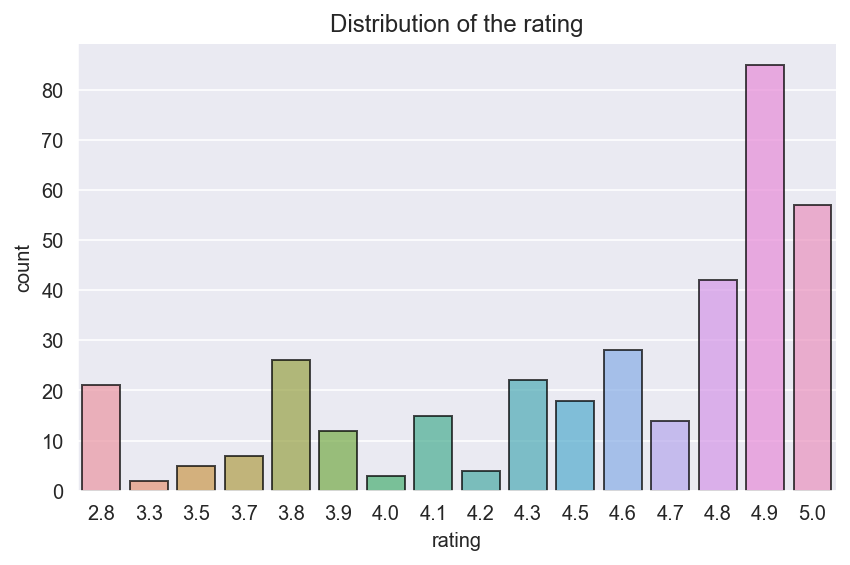

In [10]:
sns.countplot(x='rating',alpha=0.7,edgecolor="black", data=df)
sns.despine()
plt.title("Distribution of the rating")

plt.tight_layout()
plt.savefig('images/dist_rating.png', dpi=100)
plt.show()

In [11]:
# df['rating'] = df['rating'].replace([2.8],2)
# df['rating'] = df['rating'].replace([3.8, 3.5, 3.7, 3.3, 3.9],3)
# df['rating'] = df['rating'].replace([4.7, 4.9, 4.5, 4.6, 4.8, 4.1, 4.3, 4., 4.2],4)

In [12]:
df['rating'].describe(include = 'all')

count    361.000000
mean       4.481994
std        0.593607
min        2.800000
25%        4.100000
50%        4.800000
75%        4.900000
max        5.000000
Name: rating, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_info  309 non-null    object 
 1   title          361 non-null    object 
 2   rating         361 non-null    float64
 3   review         361 non-null    object 
 4   date           361 non-null    object 
dtypes: float64(1), object(4)
memory usage: 25.0+ KB


In [14]:
# df['column name'] = df['column name'].replace(['old value'],'new value')
df['title'] = df['title'].replace(['働き方（勤務時間・休日休暇・制度）'], 'Work style (working hours/holidays/systems)')
df['title'] = df['title'].replace(['年収・給与'], 'Annual salary/salary')
df['title'] = df['title'].replace(['企業カルチャー・組織体制'], 'Corporate culture/organizational system')
df['title'] = df['title'].replace(['福利厚生・オフィス環境'], 'Benefits/office environment')
df['title'] = df['title'].replace(['事業展望・強み・弱み'], 'Business prospects/strengths/weaknesses')
df['title'] = df['title'].replace(['入社前とのギャップ'], 'Gap before joining the company')
df['title'] = df['title'].replace(['女性の働きやすさ'], 'working for women')
df['title'] = df['title'].replace(['成長・働きがい'], 'Growth/motivation')

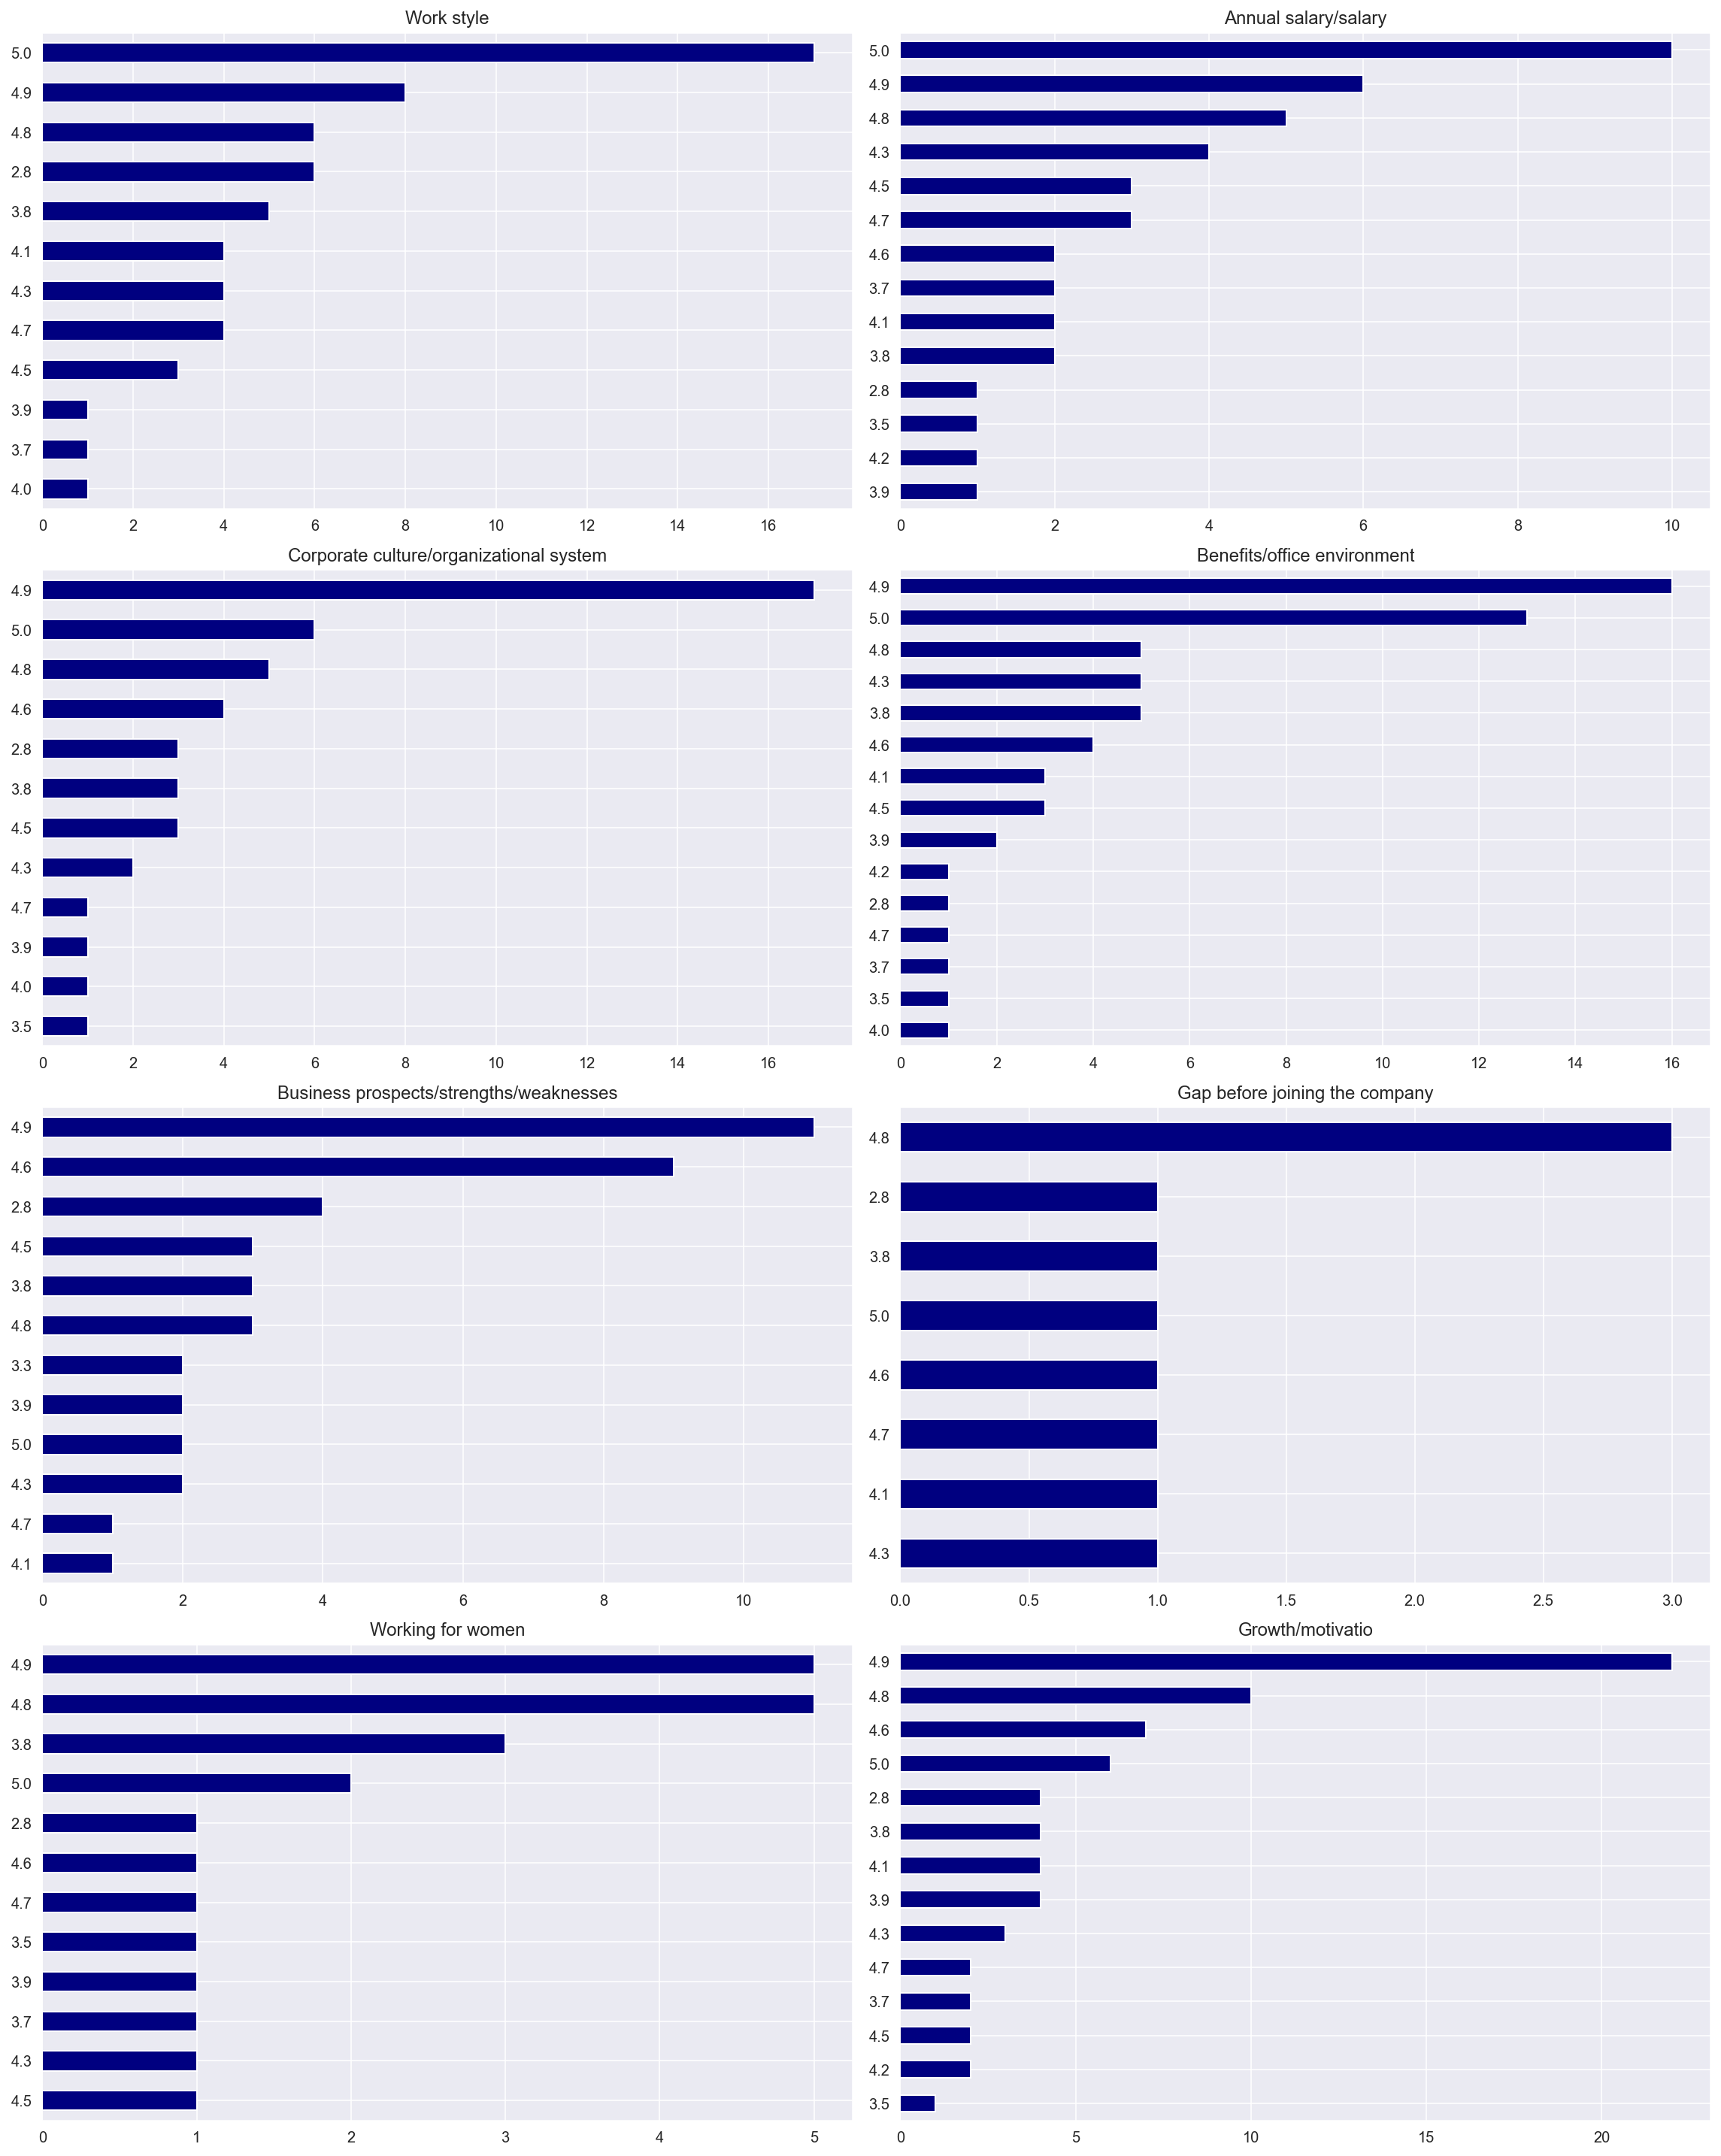

In [15]:
fig, ax = plt.subplots(4,2, figsize=(16,20))

work_balance = df[df['title'] == 'Work style (working hours/holidays/systems)']
work_balance['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][0], title='Work style')

salary = df[df['title'] == 'Annual salary/salary']
salary['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][1], title='Annual salary/salary')

culture = df[df['title'] == 'Corporate culture/organizational system']
culture['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][0], title='Corporate culture/organizational system')

benefit = df[df['title'] == 'Benefits/office environment']
benefit['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][1], title='Benefits/office environment')

business = df[df['title'] == 'Business prospects/strengths/weaknesses']
business['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][0], title='Business prospects/strengths/weaknesses')

gap = df[df['title'] == 'Gap before joining the company']
gap['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][1], title='Gap before joining the company')

women = df[df['title'] == 'working for women']
women['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][0], title='Working for women')

motivation = df[df['title'] == 'Growth/motivation']
motivation['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][1], title='Growth/motivatio')

fig.tight_layout()
plt.savefig('images/dist_vars.png', dpi=100)
plt.show()


In [16]:
df['job_title'] = df['reviewer_info']

In [17]:
# df[df['job_title'].str.contains('営業', na=False, regex=True)] = 'sales'

df.loc[df['job_title'].str.contains('営業|Sales|販売|事務', na=False, regex=True), 'job_title'] = 'sales'
df.loc[df['job_title'].str.contains('Solution Engineer|SE', na=False, regex=True), 'job_title'] = 'solution engineer'
df.loc[df['job_title'].str.contains('インサイドセールス', na=False, regex=True), 'job_title'] = 'inside sales'
df.loc[df['job_title'].str.contains('カスタマーサクセス', na=False, regex=True), 'job_title'] = 'customer success'
df.loc[df['job_title'].str.contains('アカウントエグゼクティブ|AE|アカウント・エグゼクティブ|account executive|エグゼクティブ', na=False, regex=True), 'job_title'] = ''
df.loc[df['job_title'].str.contains('BDR', na=False, regex=True), 'job_title'] = 'BDR'
df.loc[df['job_title'].str.contains('サポート', na=False, regex=True), 'job_title'] = 'support'
df.loc[df['job_title'].str.contains('IT', na=False, regex=True), 'job_title'] = 'IT Engineer'
df.loc[df['job_title'].str.contains('サクセスマネージャー', na=False, regex=True), 'job_title'] = 'success '
df.loc[df['job_title'].str.contains('アカウントパートナー', na=False, regex=True), 'job_title'] = 'account partner'
df.loc[df['job_title'].str.contains('6903', na=False, regex=True), 'job_title'] = np.nan
df.loc[df['job_title'].str.contains('企画|広告|宣伝|広告宣伝', na=False, regex=True), 'job_title'] = 'marketing'
df.loc[df['job_title'].str.contains('法務', na=False, regex=True), 'job_title'] = 'legal'
df.loc[df['job_title'].str.contains('ストラテジー', na=False, regex=True), 'job_title'] = 'strategy'
df.loc[df['job_title'].str.contains('税務', na=False, regex=True), 'job_title'] = 'accounting'


# df.loc[df['job_title'].str.contains('', na=False, regex=True), 'job_title'] = ''
# df.loc[df['job_title'].str.contains('', na=False, regex=True), 'job_title'] = ''
# df.loc[df['job_title'].str.contains('', na=False, regex=True), 'job_title'] = ''

In [18]:
df['gender'] = df['reviewer_info']
df.loc[df['gender'].str.contains('男性', na=False, regex=True), 'gender'] = 'men'
df.loc[df['gender'].str.contains('女性', na=False, regex=True), 'gender'] = 'women'

In [19]:
df['new_grads'] = df['reviewer_info']
df.loc[df['new_grads'].str.contains('新卒', na=False, regex=True), 'new_grads'] = 'new grad'
df.loc[df['new_grads'].str.contains('中途', na=False, regex=True), 'new_grads'] = 'not new grad'
df.loc[df['new_grads'].str.contains('現職|退職済み', na=False, regex=True), 'new_grads'] = np.nan

In [20]:
df['full_time'] = df['reviewer_info']
df.loc[df['full_time'].str.contains('正社員', na=False, regex=True), 'full_time'] = 'full time'
df.loc[df['full_time'].str.contains('非|非正社員|契約社員|派遣社員', na=False, regex=True), 'full_time'] = 'part time'
# df.loc[df['full_time'].str.contains('非|非正社員', na=False, regex=True), 'full_time'] = 0

In [21]:
df.loc[df['date'].str.contains('2018', na=False, regex=True), 'date'] = '2018'
df.loc[df['date'].str.contains('2019', na=False, regex=True), 'date'] = '2019'
df.loc[df['date'].str.contains('2020', na=False, regex=True), 'date'] = '2020'
df.loc[df['date'].str.contains('2021', na=False, regex=True), 'date'] = '2021'
df.loc[df['date'].str.contains('2022', na=False, regex=True), 'date'] = '2022'
df.loc[df['date'].str.contains('2015', na=False, regex=True), 'date'] = '2015'
df.loc[df['date'].str.contains('2016', na=False, regex=True), 'date'] = '2016'
df.loc[df['date'].str.contains('2017', na=False, regex=True), 'date'] = '2017'
# df.loc[df['gender'].str.contains('女性', na=False, regex=True), 'gender'] = 'women'

In [22]:
bins = [0, 4, 5]
names = ['low', 'high']
df['eval'] = pd.cut(df['rating'], bins, labels=names)

In [23]:
df.columns

Index(['reviewer_info', 'title', 'rating', 'review', 'date', 'job_title',
       'gender', 'new_grads', 'full_time', 'eval'],
      dtype='object')

In [24]:
df.drop(columns = ['reviewer_info'], inplace = True)

In [25]:
df.replace('', np.nan, inplace = True)

In [26]:
df['job_title'].unique()

array(['sales', 'solution engineer', nan, 'customer success',
       'account partner', 'inside sales', 'BDR', 'legal', 'success ',
       'marketing', 'strategy', 'accounting', 'support', 'IT Engineer'],
      dtype=object)

In [27]:
df['job_title'].ffill(inplace = True)
df['gender'].ffill(inplace = True)
df['new_grads'].ffill(inplace = True)
df['full_time'].ffill(inplace = True)
df['job_title'].ffill(inplace = True)

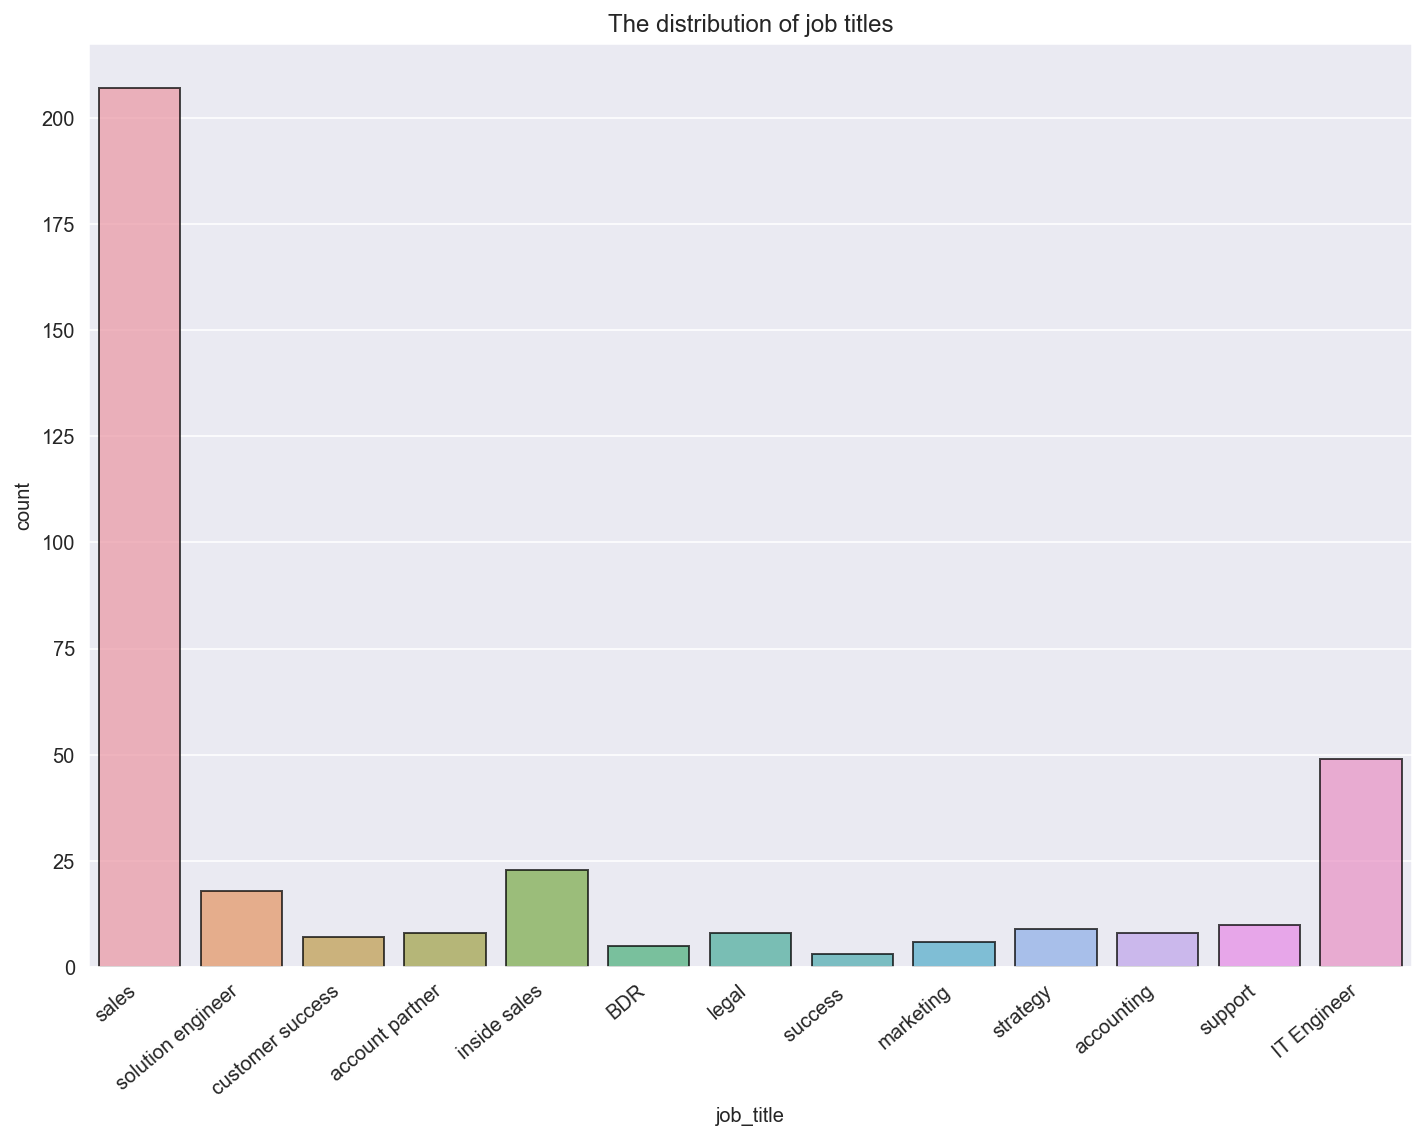

In [28]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='job_title',alpha=0.7,edgecolor="black", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# sns.despine()
plt.title('The distribution of job titles')


plt.tight_layout()
# plt.show()

plt.savefig('images/dist_positions.jpg', bbox_inches='tight')

Perfect!

In [29]:
df_dum = pd.get_dummies(df, columns = ['title',  'date', 'job_title', 'gender', 'new_grads',
       'full_time', 'eval'], prefix = ['', '', '', '', '', '', 'eval'])

In [30]:
df_dum.drop(columns = ['eval_low'], axis = 1, inplace = True)

In [31]:
data  = df_dum.iloc[:, 10:18]
job_title = df_dum.iloc[:, 18:31]
info = df_dum.iloc[:, 31:-1]

In [32]:
data['eval_high'] = df_dum['eval_high']
job_title['eval_high'] = df_dum['eval_high']
info['eval_high'] = df_dum['eval_high']

### Heatmaps

In [33]:
mask = np.zeros_like(df_dum.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

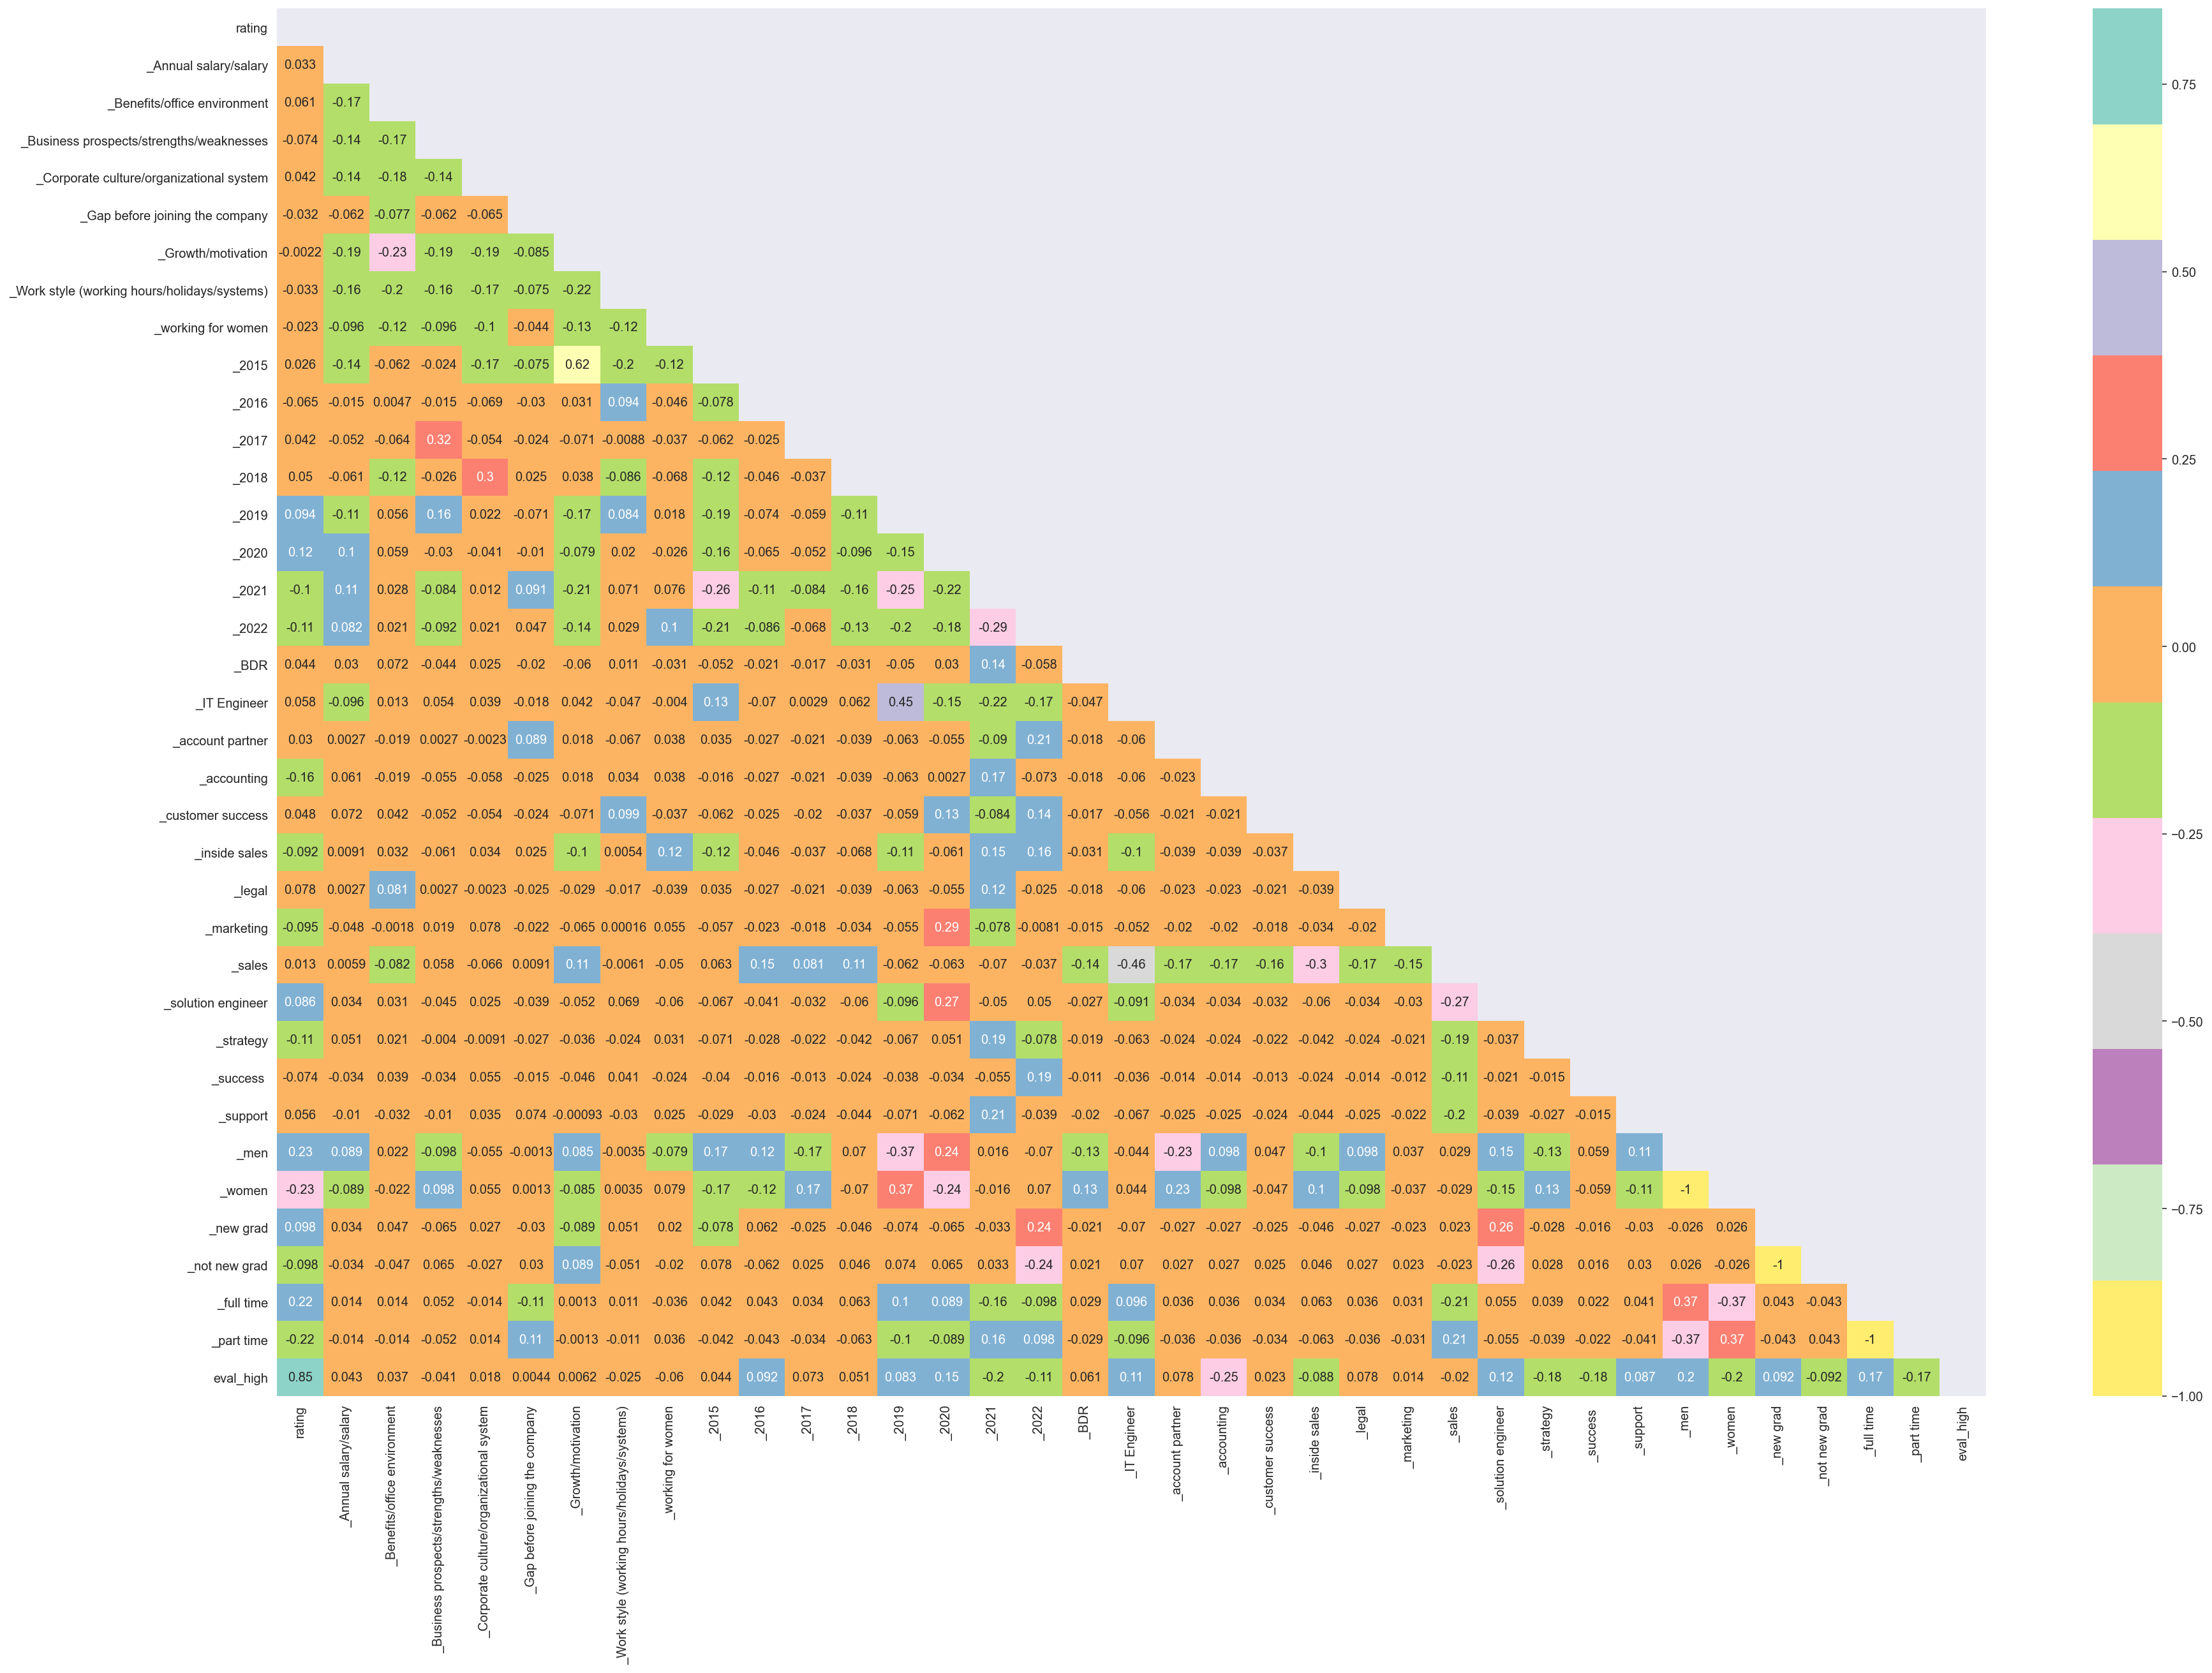

In [34]:
plt.figure(figsize=(30, 20))
# plt.yticks(rotation=0)
sns.heatmap(df_dum.corr(), annot=True, cmap="Set3_r", mask = mask)
plt.savefig('images/heatmap.png', dpi=100)
plt.show()

In [35]:
sns.set(font_scale=2)

In [36]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

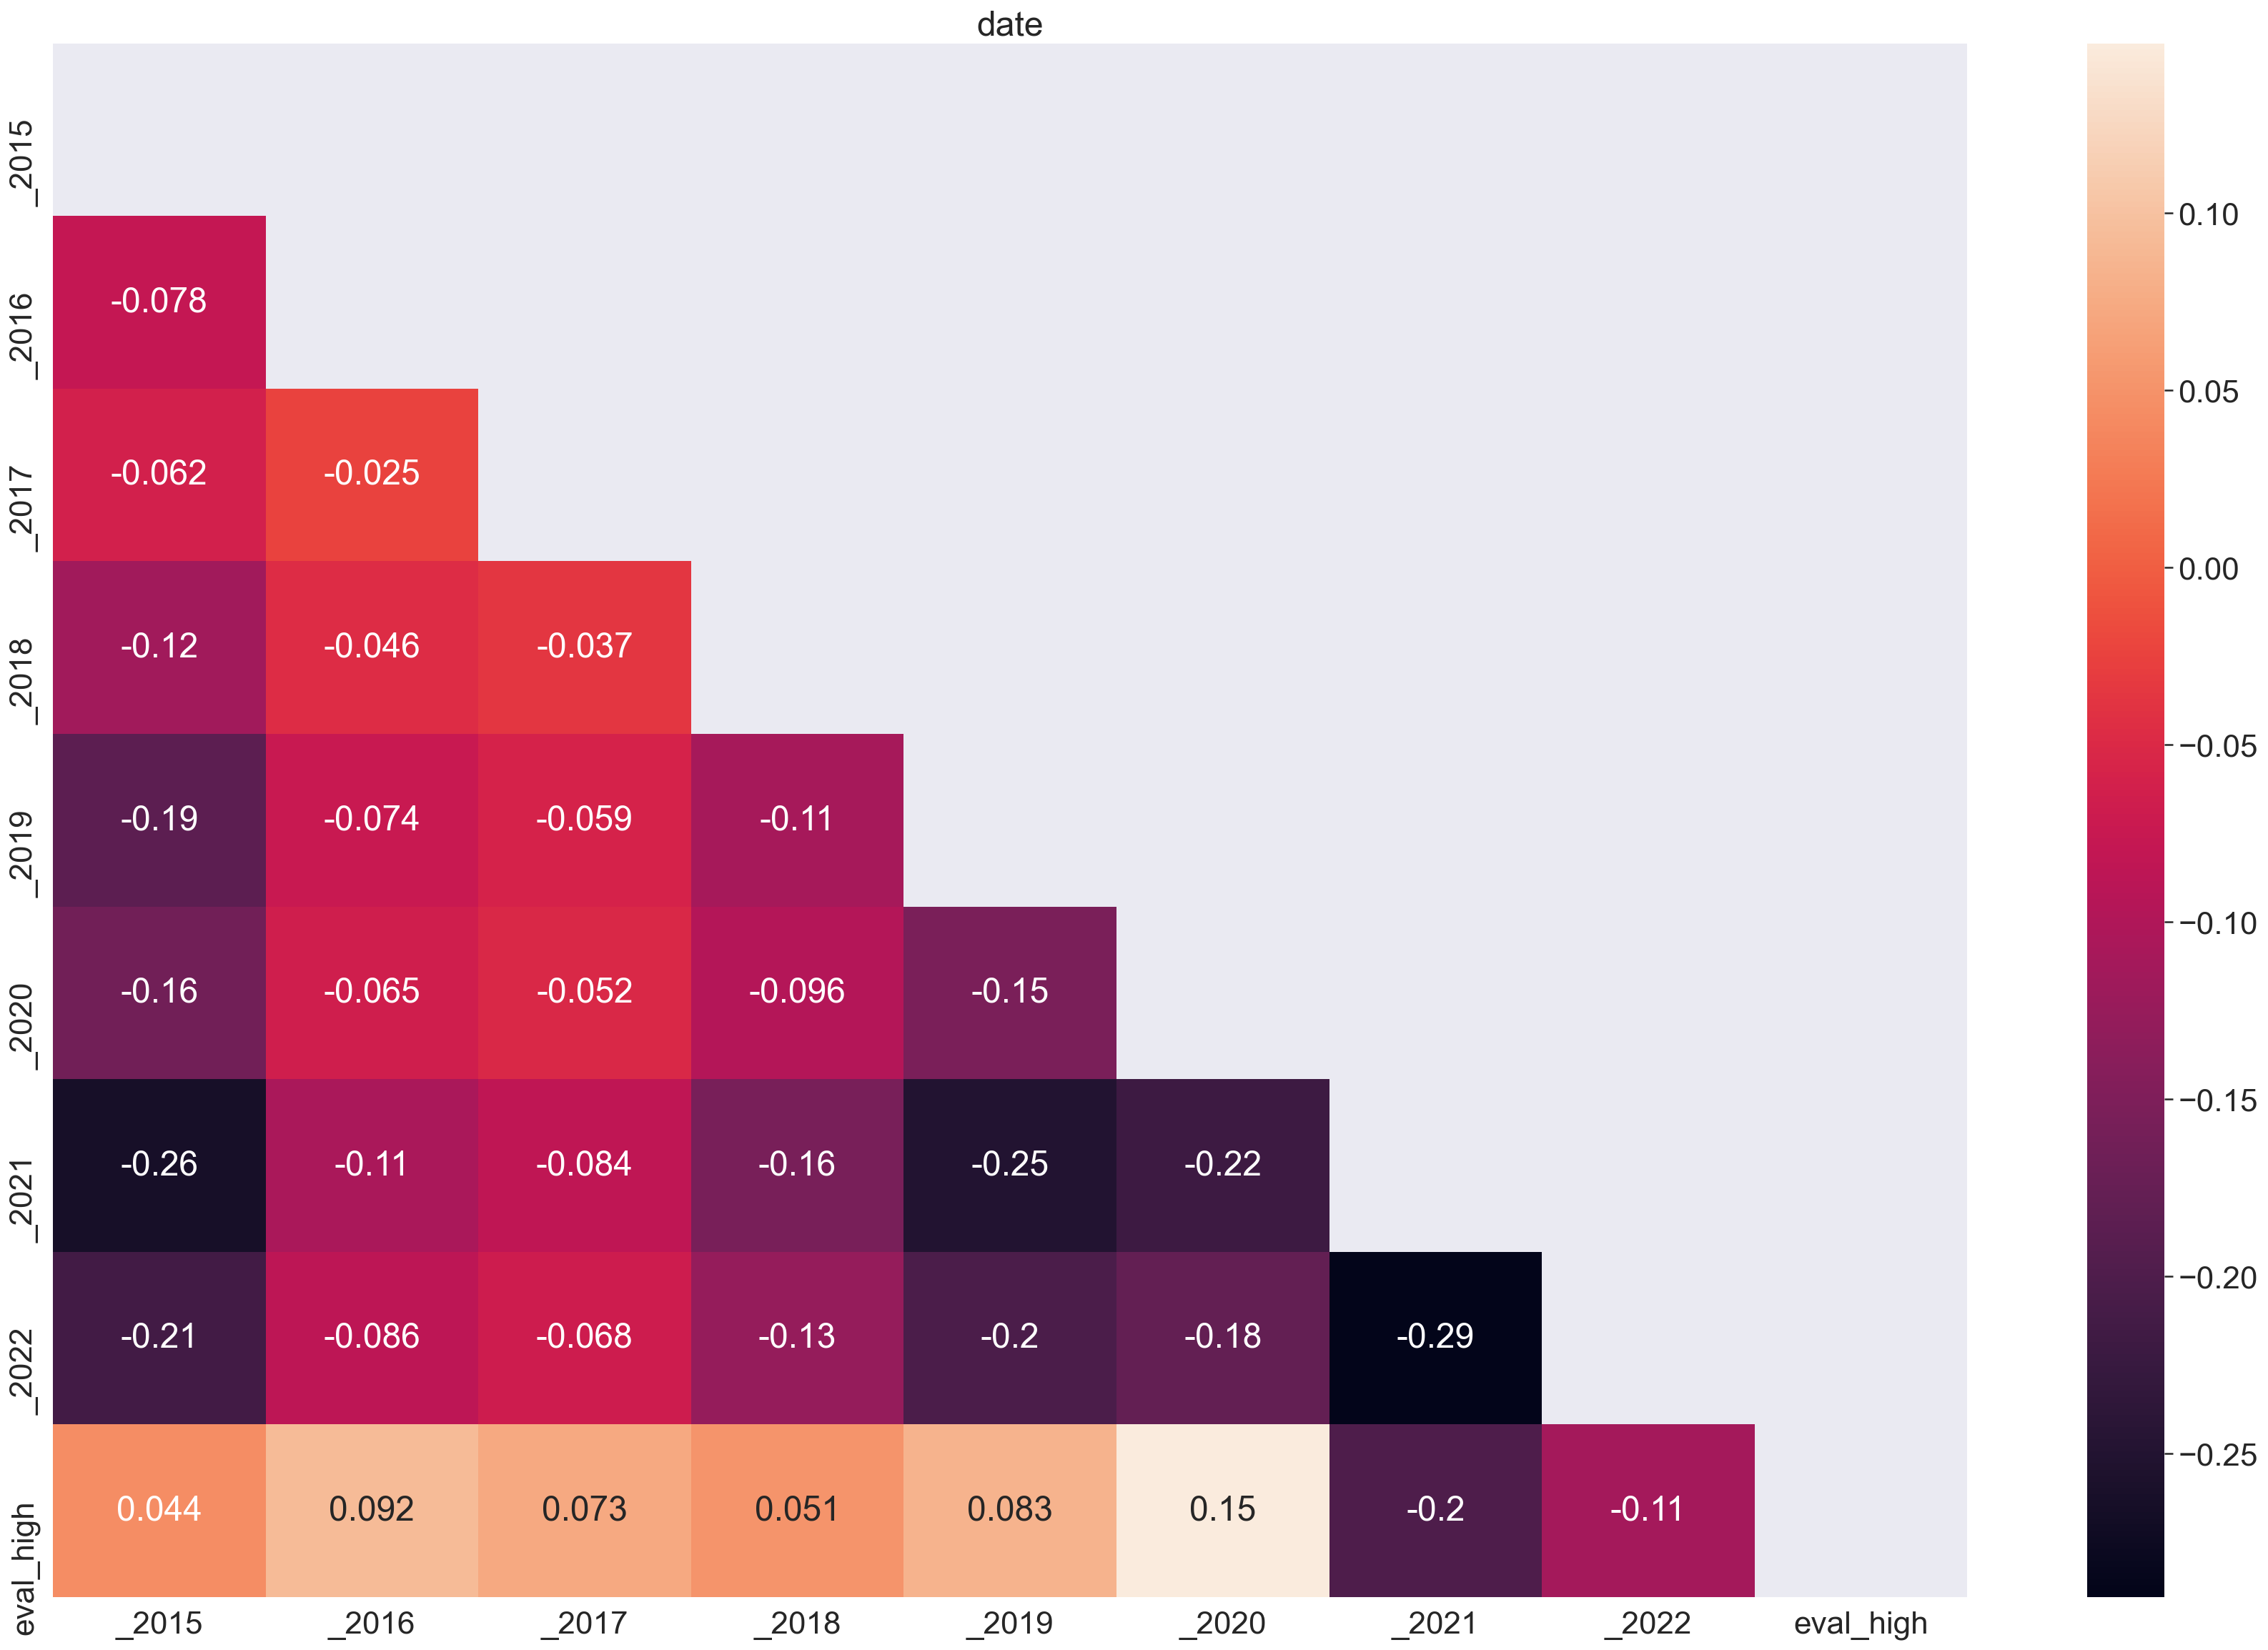

In [37]:
plt.figure(figsize=(30, 20))
# plt.yticks(rotation=0)
sns.heatmap(data.corr(), 
            annot=True, 
#             color = "Reds", 
            mask = mask)
plt.title("date")
plt.savefig('images/heatmap_data.png', dpi=100)
plt.show()

In [38]:
mask = np.zeros_like(job_title.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

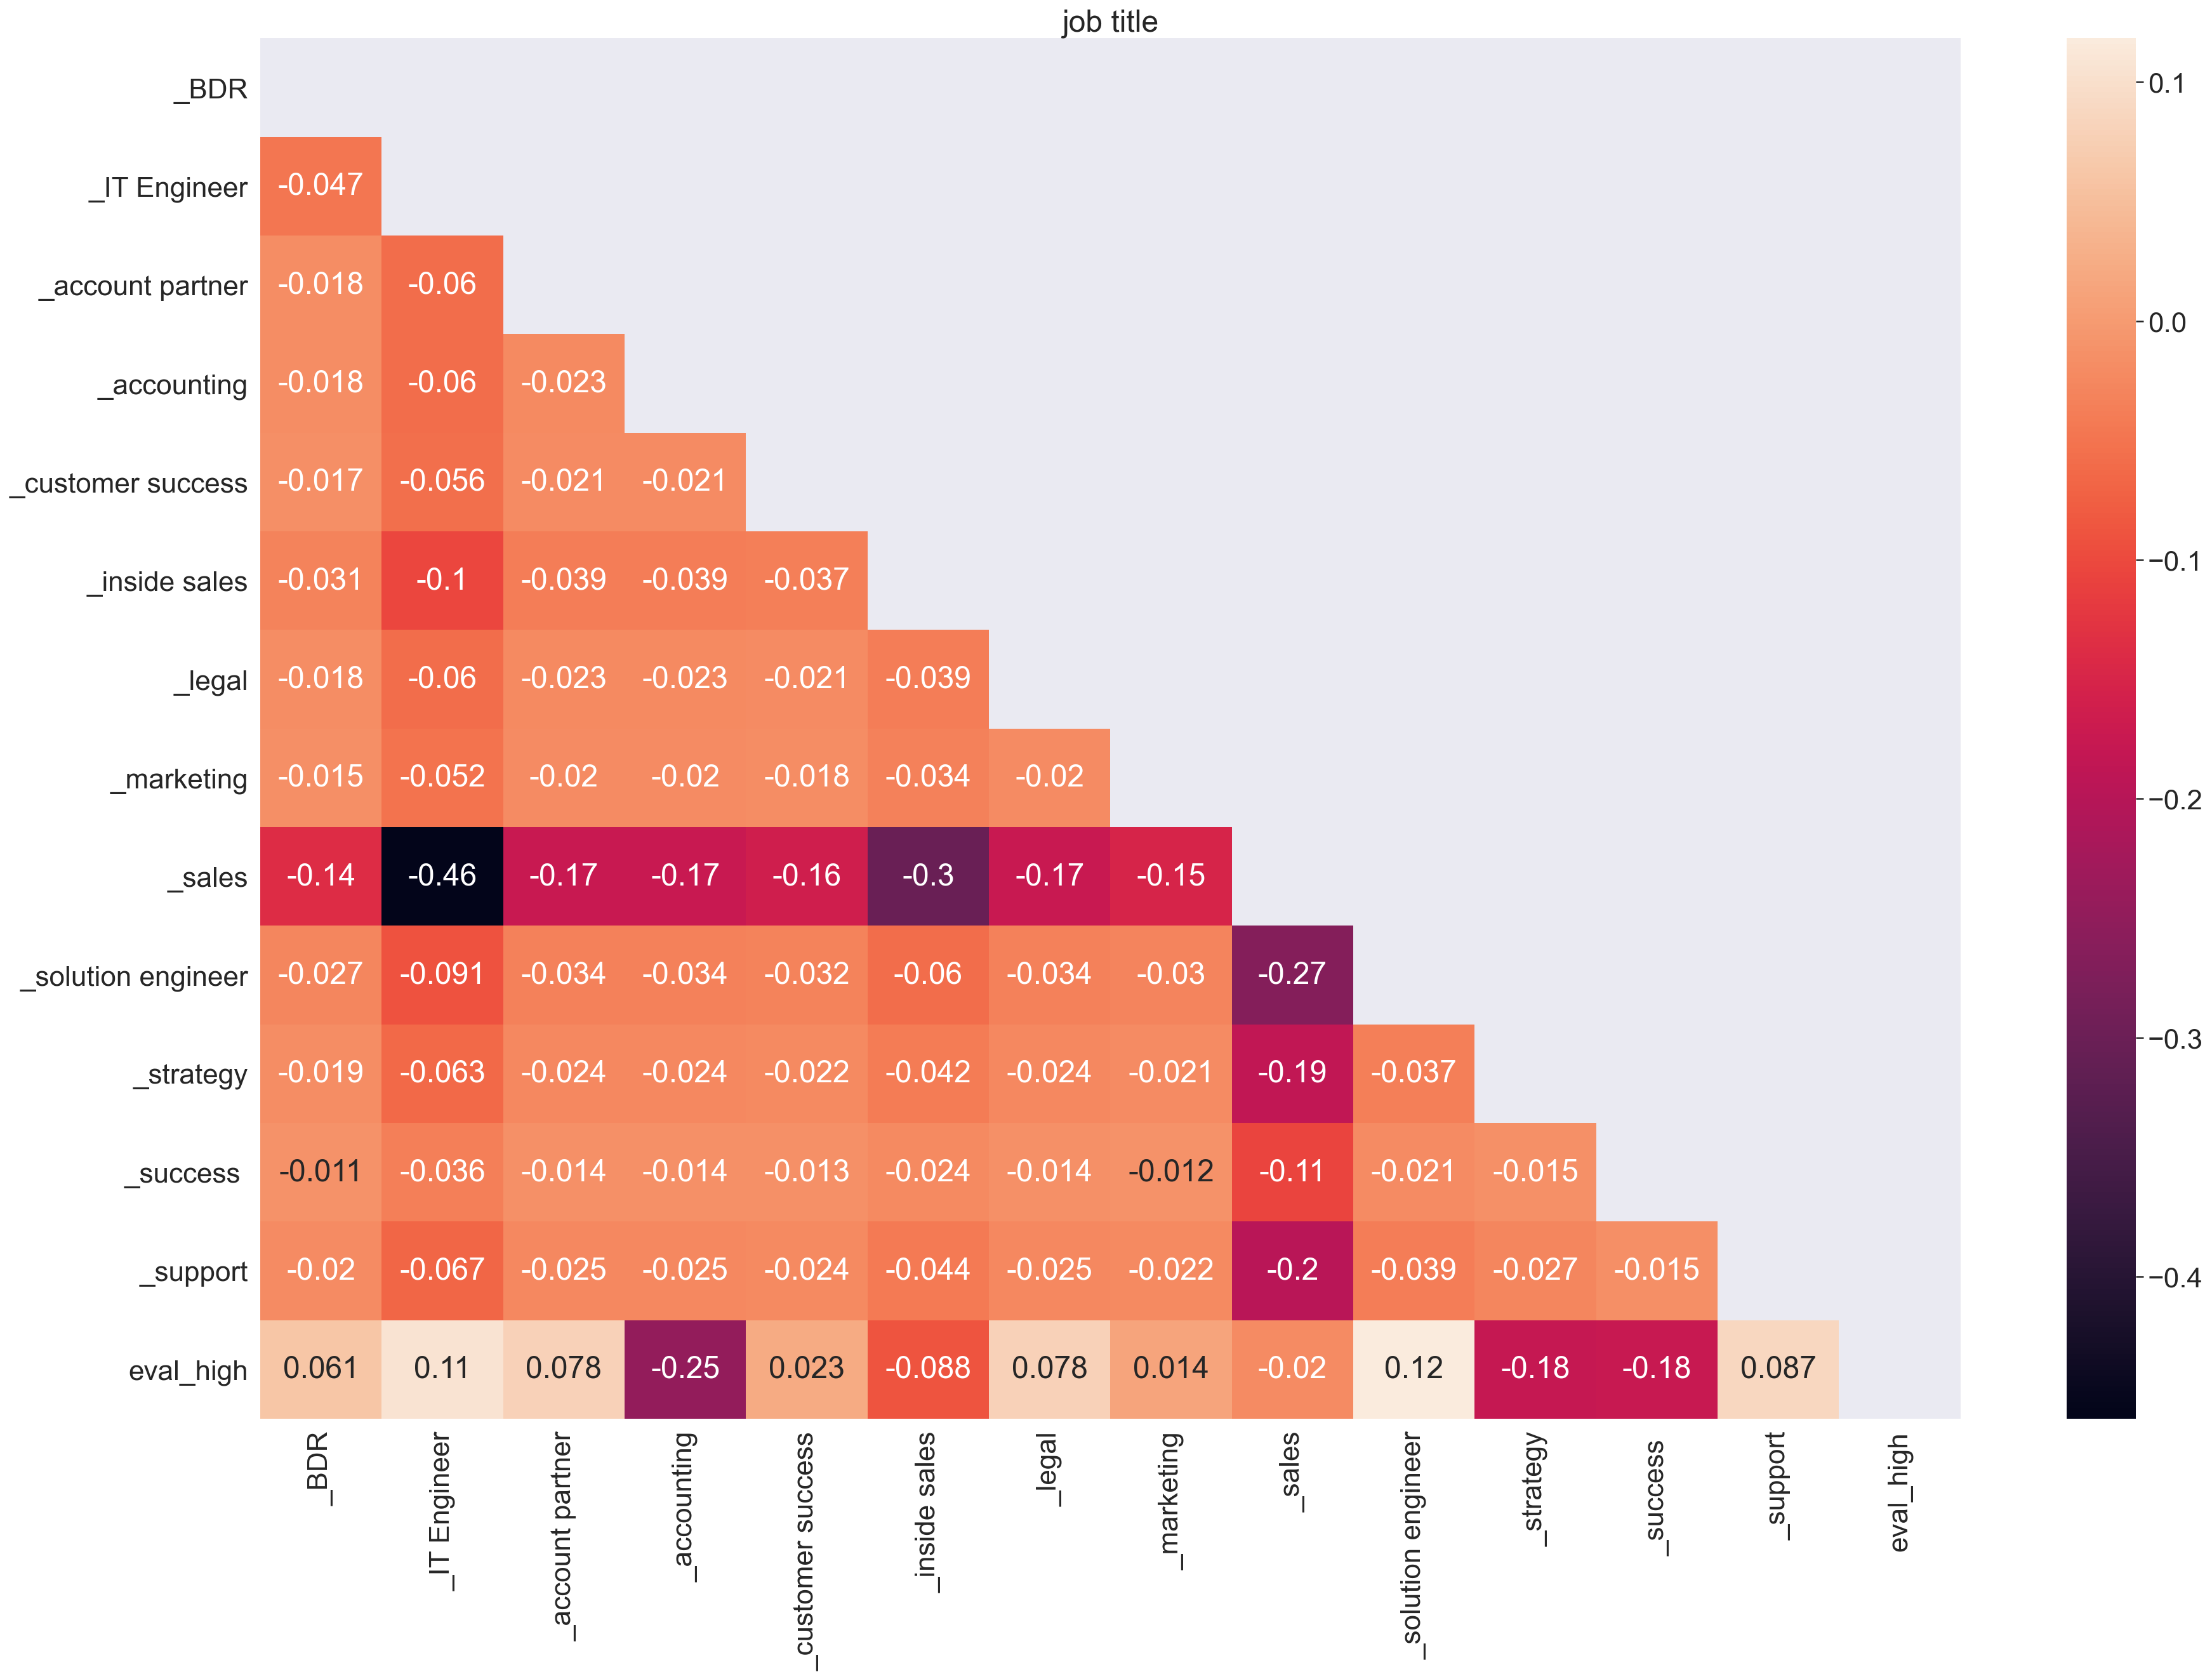

In [39]:
plt.figure(figsize=(30, 20))
# plt.yticks(rotation=0)
sns.heatmap(job_title.corr(), 
            annot=True, 
#             color = "Reds", 
            mask = mask)
plt.title("Job title")
plt.title('job title')
plt.savefig('images/heatmap_job_title.png', dpi=100)
plt.show()

In [40]:
mask = np.zeros_like(info.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

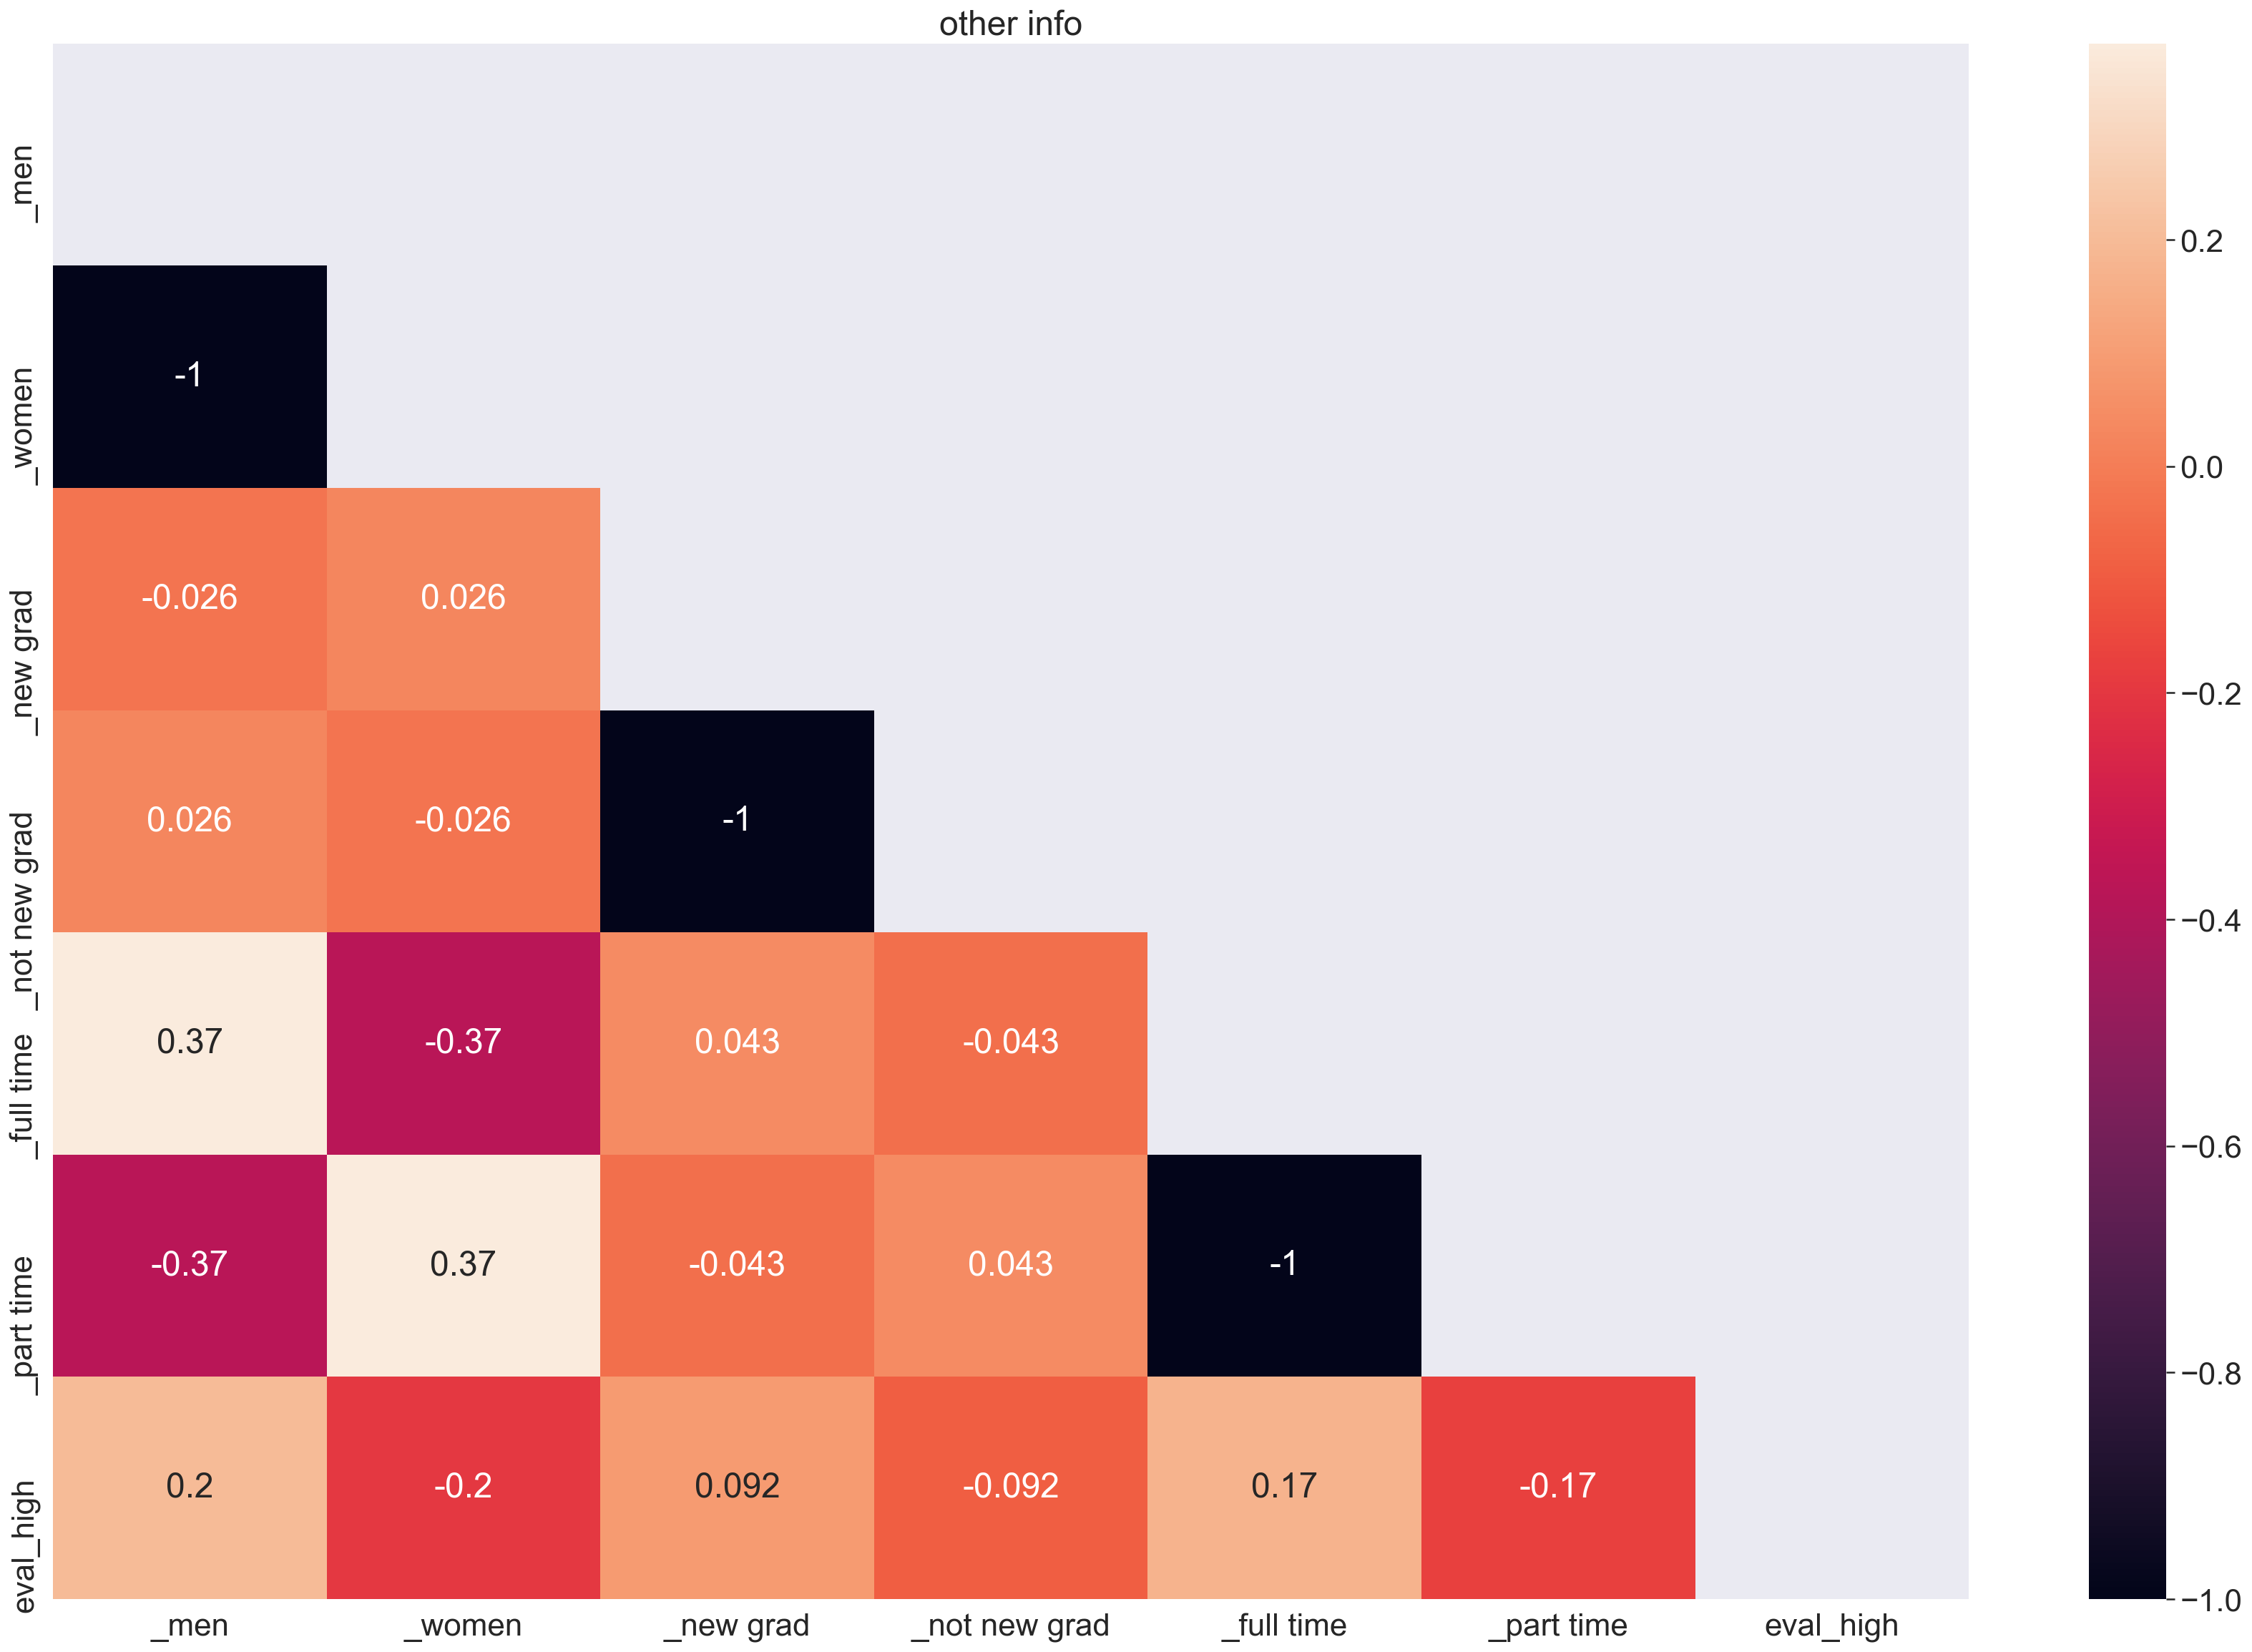

In [41]:
plt.figure(figsize=(30, 20))
# plt.yticks(rotation=0)
sns.heatmap(info.corr(), annot=True, mask = mask)
plt.title("other info")
plt.savefig('images/heatmap_info.png', dpi=100)
plt.show()

#### Number of reviews by diffrent factors

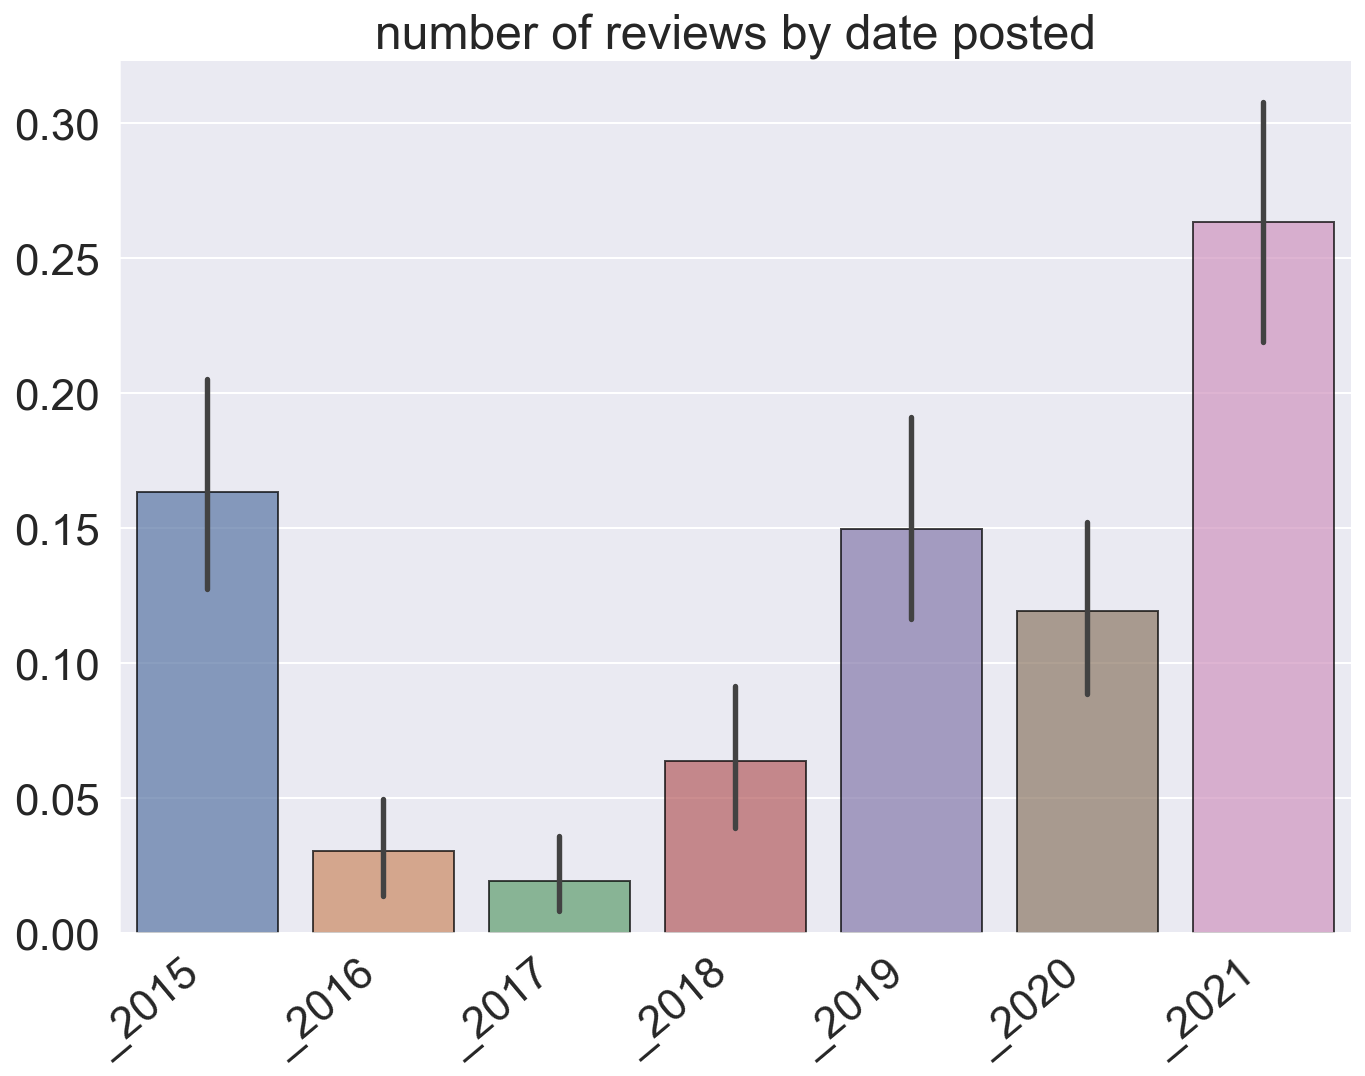

In [42]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(alpha=0.7,edgecolor="black", data=data.iloc[:, :-2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()
plt.title('number of reviews by date posted')


plt.tight_layout()
# plt.show()

plt.savefig('images/bar_by_date.jpg', bbox_inches='tight')

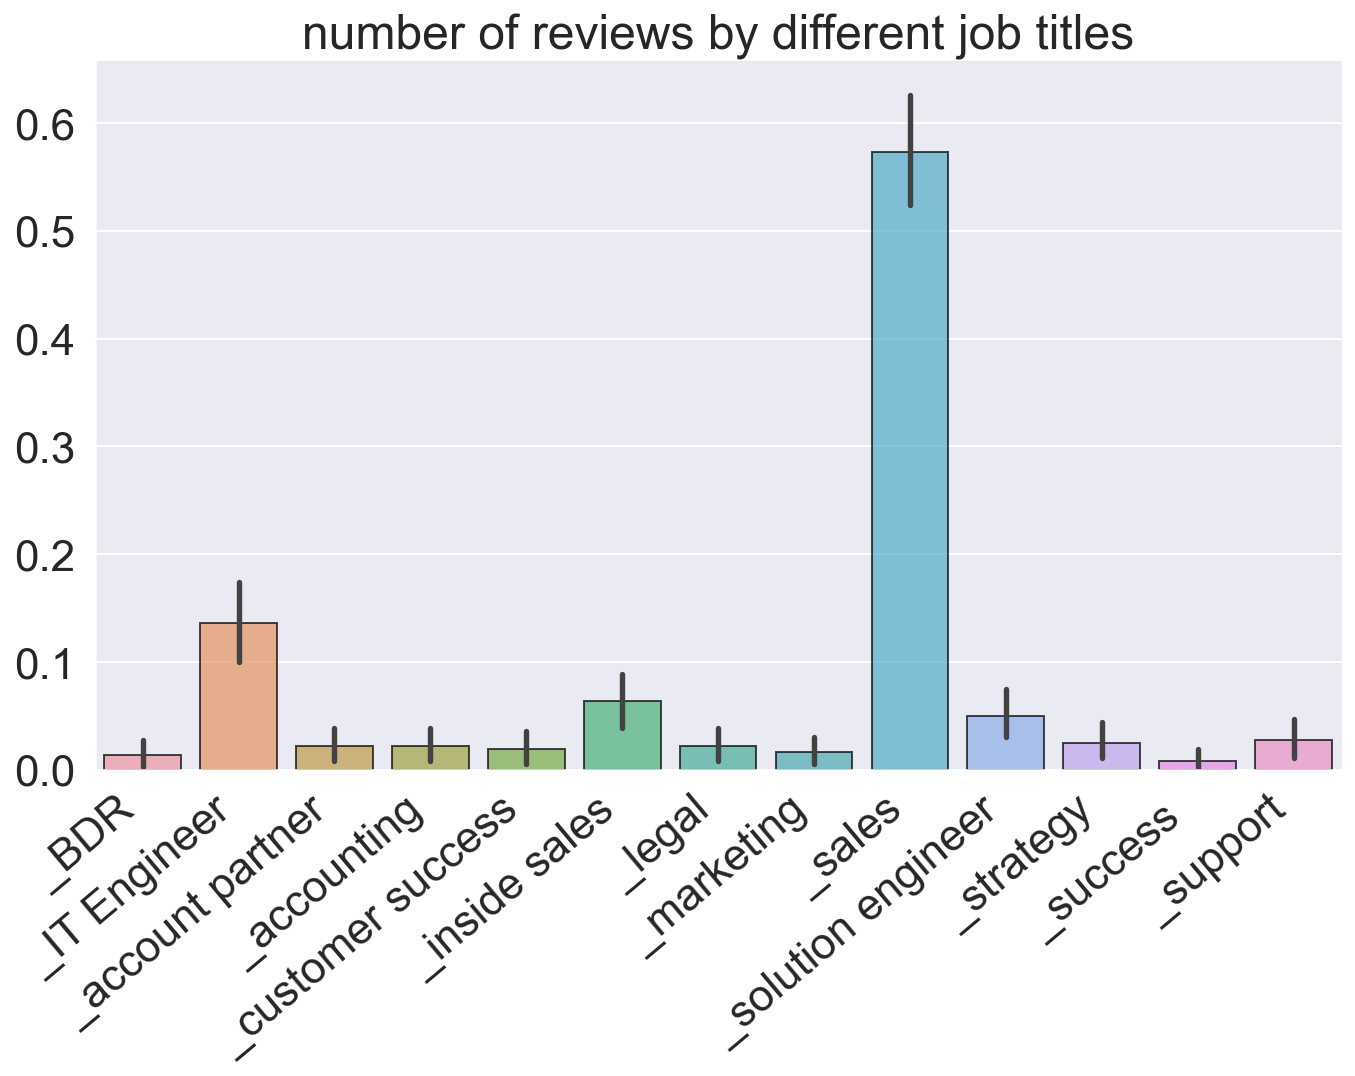

In [43]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(alpha=0.7,edgecolor="black", data=job_title.iloc[:, :-1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()
plt.title('number of reviews by different job titles')


plt.tight_layout()
# plt.show()

plt.savefig('images/bar_by_different_jobtitles.jpg', bbox_inches='tight')

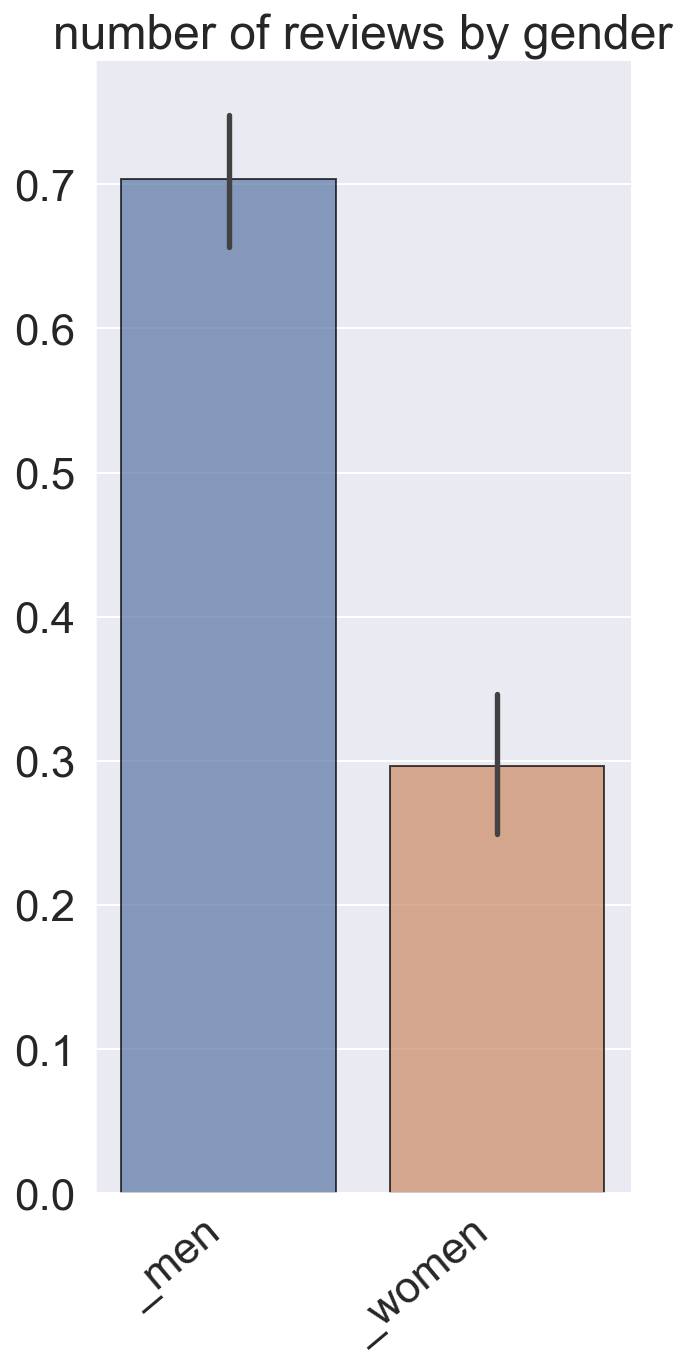

In [44]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(alpha=0.7,edgecolor="black", data=info.iloc[:, :2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()
plt.title('number of reviews by gender')


plt.tight_layout()
# plt.show()

plt.savefig('images/bar_by_gender.jpg', bbox_inches='tight')

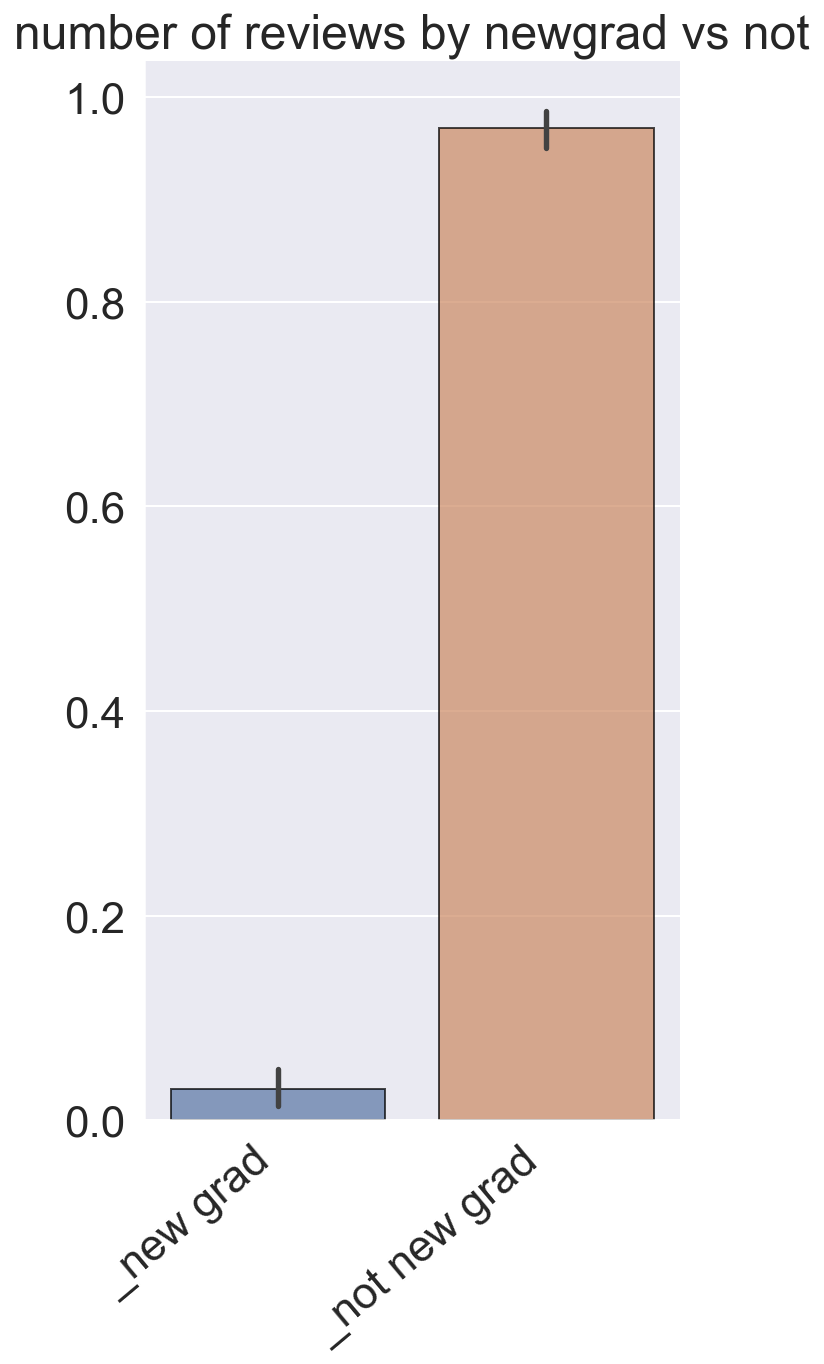

In [45]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(alpha=0.7,edgecolor="black", data=info.iloc[:, 2:4])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()
plt.title('number of reviews by newgrad vs not')


plt.tight_layout()
# plt.show()

plt.savefig('images/bar_by_new_grad.jpg', bbox_inches='tight')

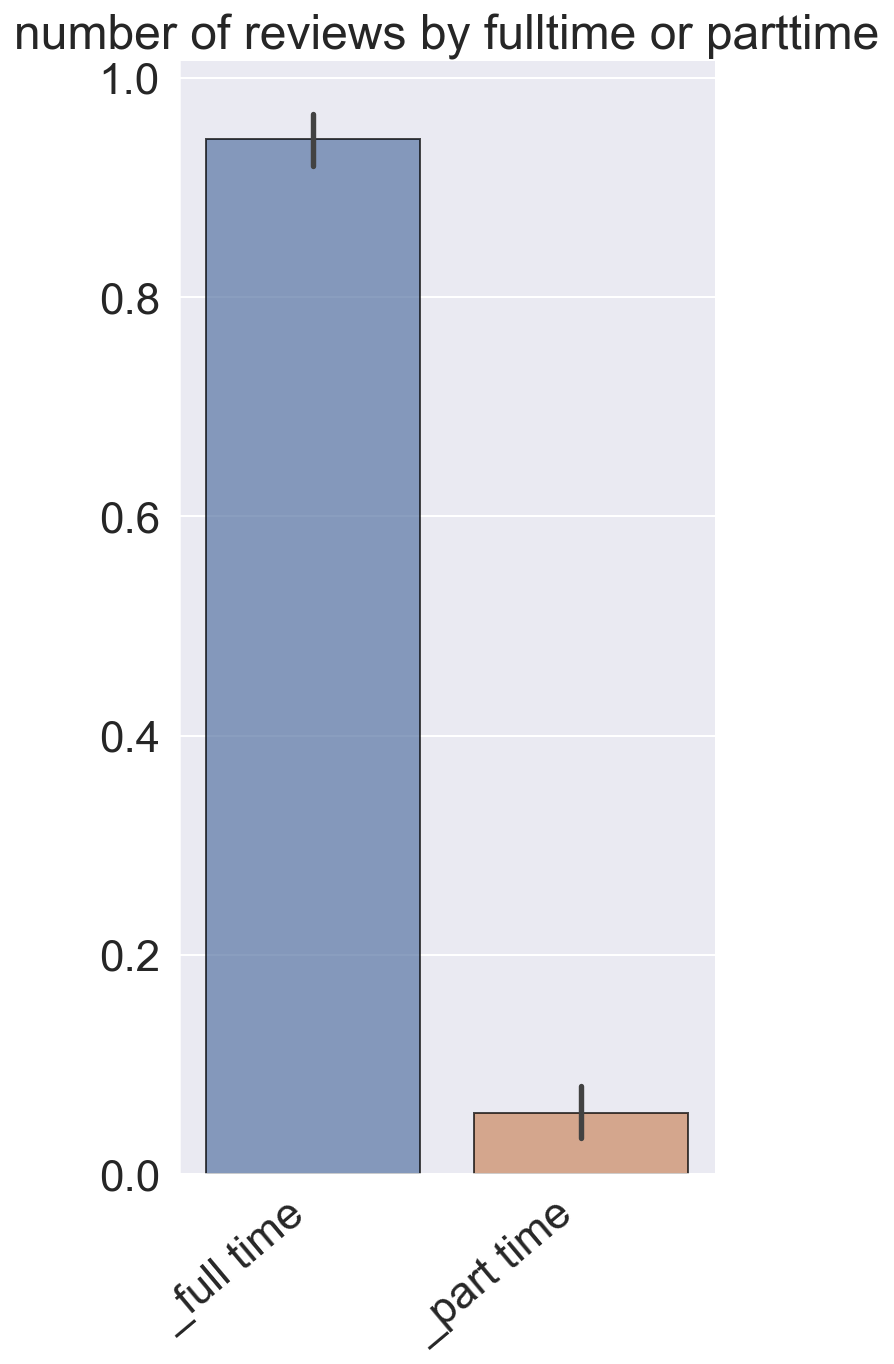

In [46]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(alpha=0.7,edgecolor="black", data=info.iloc[:, 4:6])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()
plt.title('number of reviews by fulltime or parttime')


plt.tight_layout()
# plt.show()

plt.savefig('images/bar_by_fulltime.jpg', bbox_inches='tight')